# Insurance Cost Prediction Project

## Group Number: 400
## Team Members:
- Max Raney
- [Member 2 Name]
- [Member 3 Name]

# Insurance Cost Prediction Project

## Overview
This Jupyter notebook presents the code for the Insurance Cost Prediction project. The goal is to build and compare machine learning models for predicting insurance costs based on various features, including age, sex, BMI, and location.

## Contents
1. [Data Loading](#data-loading)
2. [Data Preprocessing](#data-preprocessing)
3. [Model Training - Linear Regression](#model-training-linear-regression)
4. [Model Training - Random Forests](#model-training-random-forests)
5. [Model Training - AdaBoost](#model-training-adaboost)
6. [Model Training - Gradient Boosting](#model-training-gradient-boosting)
7. [Model Training - Neural Network](#model-training-neural-network)
8. [Model Comparison](#model-comparison)

## 1. Loading
Code for loading the dataset and libraries required for the project.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam




%matplotlib inline

In [2]:
# Load the data
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 2. Data Preprocessing
This section covers the preprocessing steps applied to the insurance dataset before building the predictive models.

In [3]:
# 1. Encode Categorical Variables
data_encoded = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)

# 2. Feature Scaling
# Extract numerical features
numerical_features = ['age', 'bmi', 'children']

# Create a scaler object
scaler = StandardScaler()

# Apply scaling to numerical features
data_encoded[numerical_features] = scaler.fit_transform(data_encoded[numerical_features])

data_encoded.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,16884.92400,False,True,False,False,True
1,-1.509965,0.509621,-0.078767,1725.55230,True,False,False,True,False
2,-0.797954,0.383307,1.580926,4449.46200,True,False,False,True,False
3,-0.441948,-1.305531,-0.908614,21984.47061,True,False,True,False,False
4,-0.513149,-0.292556,-0.908614,3866.85520,True,False,True,False,False


In [4]:
# Split the data into features (X) and target variable (y)
X = data_encoded.drop('charges', axis=1)
y = data_encoded['charges']

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display data
print("Training set - Features:", X_train.shape, "Target:", y_train.shape)
print("Testing set - Features:", X_test.shape, "Target:", y_test.shape)

Training set - Features: (1070, 8) Target: (1070,)
Testing set - Features: (268, 8) Target: (268,)


## 3. Model Training - Linear Regression
Code for training the linear regression model.

In [5]:
# Train model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_linear_reg = linear_reg_model.predict(X_test)

# Evaluate mse and r2
mse_linear_reg = mean_squared_error(y_test, y_pred_linear_reg)
mae_linear_reg = np.mean(np.abs(y_test - y_pred_linear_reg))
rmse_linear_reg = np.sqrt(mse_linear_reg)
r2_linear_reg = r2_score(y_test, y_pred_linear_reg)

print("Mean Squared Error:", mse_linear_reg)
print("Mean Absolute Error:", mae_linear_reg)
print("Root Mean Squared Error:", rmse_linear_reg)
print("R-squared:", r2_linear_reg)

Mean Squared Error: 33596915.85136146
Mean Absolute Error: 4181.1944737536505
Root Mean Squared Error: 5796.2846592762735
R-squared: 0.7835929767120723


## 4. Model Training - Random Forests
Code for training the random forests model.

In [6]:
SEED = 2023

#instantiate the Random Forest Regressor
rfr = RandomForestRegressor(n_estimators=500, max_depth=None, random_state=SEED)
rfr.fit(X_train, y_train)

#predict on the test data
y_pred_rand_forest = rfr.predict(X_test)

#calculate the Root Mean Square Error on the test data
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rand_forest))

#print the RMSE
print(f'Root Mean Square Error: {test_rmse:.2f}')

#feature importance can also be extracted from the Random Forest model
feature_importances = rfr.feature_importances_
# Assuming X_train is a pandas DataFrame, we can make use of the column names
sorted_idx = np.argsort(feature_importances)[::-1]

#print the feature importances
print("Feature Importances:")
for i in range(X_train.shape[1]):
    print(f"{X_train.columns[sorted_idx[i]]}: {feature_importances[sorted_idx[i]]:.4f}")

Root Mean Square Error: 4577.41
Feature Importances:
smoker_yes: 0.6067
bmi: 0.2170
age: 0.1345
children: 0.0202
sex_male: 0.0063
region_northwest: 0.0055
region_southeast: 0.0054
region_southwest: 0.0044


## 5. Model Training - AdaBoost
Code for training the AdaBoost model.


In [7]:
SEED = 2023

# Create base level regressor model and fit training data
first_est = DecisionTreeRegressor(max_depth=1)
adaboost_first = AdaBoostRegressor(estimator=first_est, n_estimators=10, random_state=SEED, learning_rate=0.01)
adaboost_first.fit(X_train, y_train)

# Make prediction
first_pred = adaboost_first.predict(X_test)

# Calculate accuracy(r2 score) and mean squared error
first_acc = adaboost_first.score(X_test, y_test)
mse1 = mean_squared_error(y_test, first_pred)

print("First model accuracy:           ", first_acc)
print("First model mean squared error: ", mse1)

First model accuracy:            0.659215332770596
First model mean squared error:  52906387.29921113


In [8]:
# Optimize tree depth
acc_trees = []
mse_trees = []
for d in range(1, 21):
    # Create decision tree with specified depth (1-20)
    est = DecisionTreeRegressor(max_depth=d)
    est.fit(X_train, y_train)
    pred = est.predict(X_test)

    # Calculate associated r2 score and mse 
    acc_trees.append(est.score(X_test, y_test))
    mse_trees.append(mean_squared_error(y_test, pred))

# Save best estimator
best_depth = np.argmax(acc_trees) + 1
best_est = DecisionTreeRegressor(max_depth=best_depth)

print("Best Tree Depth: ", best_depth)
print("Model Accuracy:  ", np.max(acc_trees))

Best Tree Depth:  4
Model Accuracy:   0.8641310379678356


In [9]:
# Create parameter grid to iterate through
num_est = np.linspace(10, 210, 11, dtype=int)
learn_rate = [0.1, 0.01, 0.001]
params = { 'n_estimators' : num_est, 'learning_rate' : learn_rate}

# Create AB regressor model, with saved base estimator from earlier
ABR = AdaBoostRegressor(random_state=SEED, estimator=best_est)

# Perform grid search
gs = GridSearchCV(estimator=ABR, param_grid=params, scoring=['r2'], cv=3, refit='r2')
gs.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=4),
                                         random_state=2023),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'n_estimators': array([ 10,  30,  50,  70,  90, 110, 130, 150, 170, 190, 210])},
             refit='r2', scoring=['r2'])

In [10]:
# Save best parameters found in gridsearch, and create a new model based off these parameters
best_num_est, best_learning_rate = gs.best_params_['n_estimators'], gs.best_params_['learning_rate']
results = pd.DataFrame(gs.cv_results_)
best_ABR = AdaBoostRegressor(random_state=SEED, estimator=best_est, n_estimators=best_num_est, learning_rate=best_learning_rate)

# Fit training data and make prediction
best_ABR.fit(X_train, y_train)
y_pred_adaboost = best_ABR.predict(X_test)

# Compute metrics of accuracy and print values
mse = mean_squared_error(y_test, y_pred_adaboost)
rootmse = np.sqrt(mse)
mae = np.mean(np.abs(y_test-y_pred_adaboost))
r2 = r2_score(y_test, y_pred_adaboost)

print("Mean squared error:      ", mse)
print("Root mean squared error: ", rootmse)
print("Mean absolute error:     ", mae)
print("R2 Score:                ", r2)

Mean squared error:       20437912.642245267
Root mean squared error:  4520.830968112529
Mean absolute error:      2648.0295058079105
R2 Score:                 0.8683537543536821


## 6. Model Training - Gradient Boosting
Code for training the gradient boosting model.

In [11]:
# Setting SEED for reproducibility
SEED = 2023

# Instantiate Gradient Boosting Regressor
gbr = GradientBoostingRegressor(loss='absolute_error',
                                learning_rate=0.1,
                                n_estimators=500,
                                max_depth = 1,
                                random_state = SEED,
                                max_features = 6) #Features

# Fit to training set
gbr.fit(X_train, y_train)

# Predict on test set
y_pred_grad_boost = gbr.predict(X_test)

# test set RMSE
test_rmse = mean_squared_error(y_test, y_pred_grad_boost) ** (1 / 2)

# Print rmse
print('Root mean Square error: {:.2f}'.format(test_rmse))

Root mean Square error: 6393.70


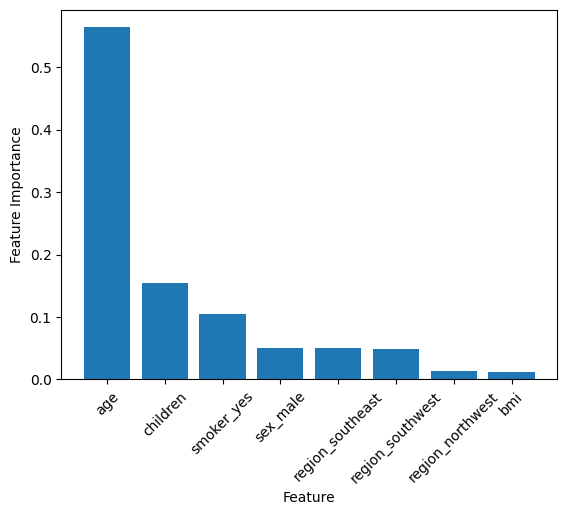

In [12]:
# Feature importance plot
feature_importance = gbr.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]

plt.bar(range(X_train.shape[1]), feature_importance[sorted_idx], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_idx], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.show()

## 7. Model Training - Neural Network
- 8 neurons in the first layer
- Using relu since it is the most commonly used activation function. Introduces non-linearily. 
- reserve 10% of the model for validation

In [13]:
# Adapt data for Neural Net
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [14]:
# Create and train model
model = Sequential()
model.add(Dense(8, activation='relu', input_dim=X_train_nn.shape[1]))
model.add(Dense(1))
model.compile(optimizer=Adam(), loss='mse', metrics=['mae'])

history = model.fit(X_train_nn, y_train_nn, epochs=100, batch_size=20, validation_split=0.1)


Epoch 1/100


49/49 [==============================] - 2s 10ms/step - loss: 0.0944 - mae: 0.2485 - val_loss: 0.0692 - val_mae: 0.2102
Epoch 2/100
49/49 [==============================] - 0s 3ms/step - loss: 0.0585 - mae: 0.1940 - val_loss: 0.0465 - val_mae: 0.1711
Epoch 3/100
49/49 [==============================] - 0s 4ms/step - loss: 0.0405 - mae: 0.1594 - val_loss: 0.0338 - val_mae: 0.1440
Epoch 4/100
49/49 [==============================] - 0s 3ms/step - loss: 0.0299 - mae: 0.1353 - val_loss: 0.0253 - val_mae: 0.1220
Epoch 5/100
49/49 [==============================] - 0s 3ms/step - loss: 0.0233 - mae: 0.1168 - val_loss: 0.0197 - val_mae: 0.1068
Epoch 6/100
49/49 [==============================] - 0s 3ms/step - loss: 0.0187 - mae: 0.1016 - val_loss: 0.0158 - val_mae: 0.0946
Epoch 7/100
49/49 [==============================] - 0s 3ms/step - loss: 0.0152 - mae: 0.0890 - val_loss: 0.0132 - val_mae: 0.0848
Epoch 8/100
49/49 [==============================] - 0s 2ms/step - loss: 0.0130

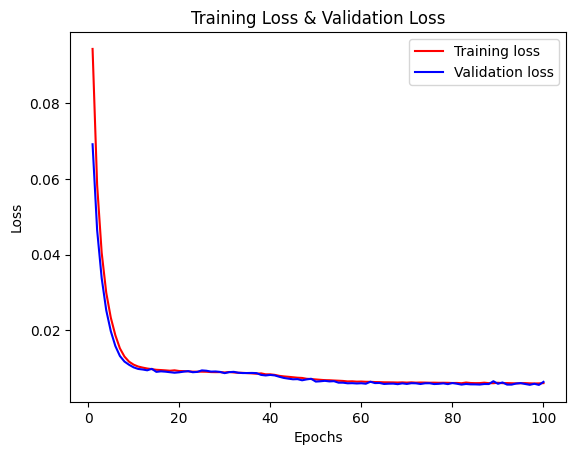

In [15]:
trainingLoss = history.history['loss']
validationLoss = history.history['val_loss']
epochs = range(1, len(trainingLoss) + 1)

plt.figure()
plt.plot(epochs, trainingLoss, 'r-', label='Training loss')
plt.plot(epochs, validationLoss, 'b-', label='Validation loss')
plt.title('Training Loss & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

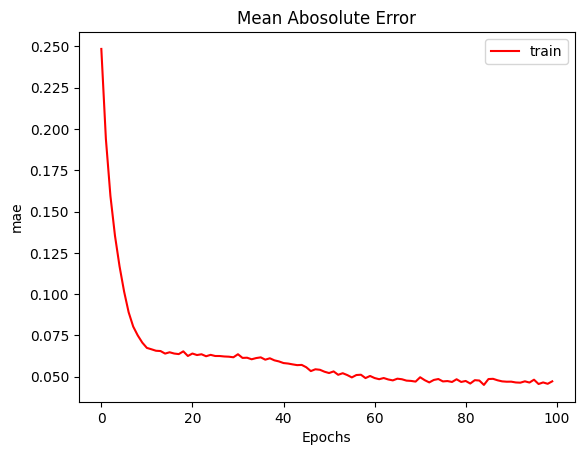

In [16]:
# plot training loss
mae = history.history['mae']
plt.plot(mae, color='red')
plt.title('Mean Abosolute Error')
plt.ylabel('mae')
plt.xlabel('Epochs')
plt.legend(['train'])
plt.show()

In [17]:
# Evaluate the performance of the neural network model
y_pred_nn_standardized = model.predict(X_test_nn)
y_pred_nn = scaler.inverse_transform(y_pred_nn_standardized)
mse_nn = mean_squared_error(y_test_nn, y_pred_nn)
mae_nn = np.mean(np.abs(y_test_nn - y_pred_nn))
rmse_nn = np.sqrt(mse_nn)
r2_nn = r2_score(y_test_nn, y_pred_nn)

print("Neural Network Model Performance:")
print("Mean Squared Error:", mse_nn)
print("Mean Absolute Error:", mae_nn)
print("Root Mean Squared Error:", rmse_nn)
print("R-squared:", r2_nn)

9/9 [==============================] - 0s 706us/step
Neural Network Model Performance:
Mean Squared Error: 278252297.28852284
Mean Absolute Error: 12163.321857564932
Root Mean Squared Error: 16680.89617761956
R-squared: -7034493013.200857


## 8. Model Comparison
Code for evaluating and comparing the performance of different models.

In [18]:
def results(prediction, y=y_test.values):
    # print accuracy scores
    mse = mean_squared_error(y, prediction)
    mae = np.mean(np.abs(y - prediction))
    rmse = np.sqrt(mse)
    r2 = r2_score(y, prediction)

    print("Mean Squared Error:", mse)
    print("Mean Absolute Error:", mae)
    print("Root Mean Squared Error:", rmse)
    print("R-squared:", r2)

    # plot predicted data vs actual
    plt.figure(figsize=(10, 6))
    plt.scatter(y, prediction, alpha=0.5)
    plt.plot([min(y), max(y)], [min(y), max(y)], '--k', linewidth=2)  # Diagonal line for reference
    plt.title('Predicted vs Actual')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

    residuals = y - prediction
    plt.figure(figsize=(10, 6))
    plt.scatter(prediction, residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--', linewidth=2)  # Horizontal line at y=0 for reference
    plt.title('Residual Plot')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.hist(residuals, bins=30, edgecolor='black', alpha=0.7)
    plt.title('Distribution of Residuals')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(y, label='Actual', marker='o')
    plt.plot(prediction, label='Predicted', marker='o')
    plt.title('Actual vs Predicted (Line Plot)')
    plt.xlabel('Data Points')
    plt.ylabel('Values')
    plt.legend()
    plt.show()

## Linear Regression

Mean Squared Error: 33596915.85136146
Mean Absolute Error: 4181.1944737536505
Root Mean Squared Error: 5796.2846592762735
R-squared: 0.7835929767120723


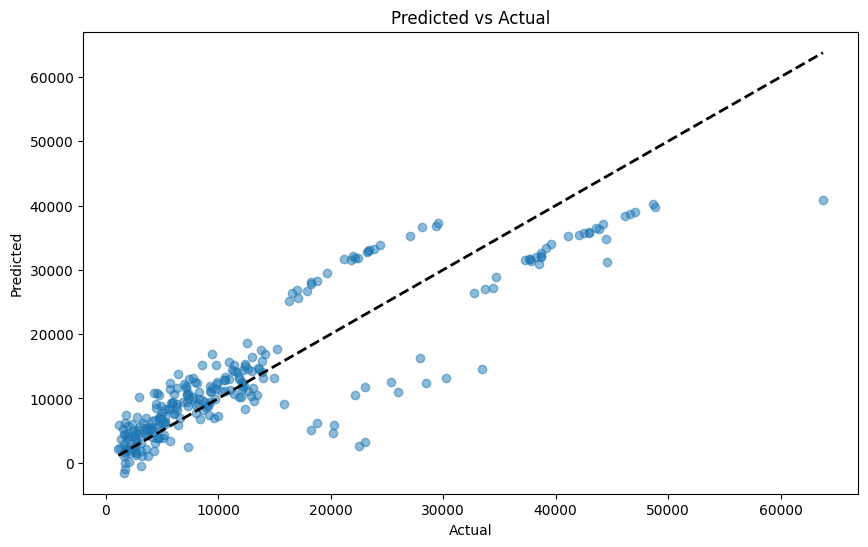

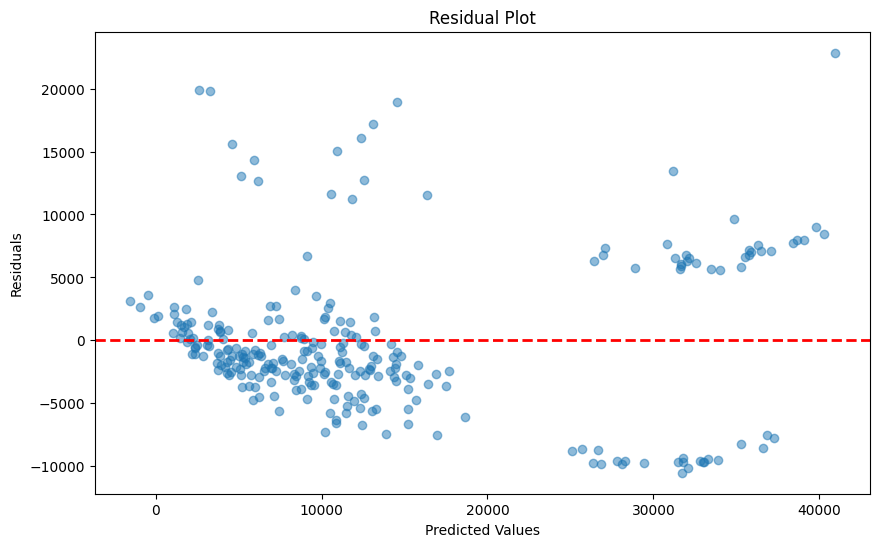

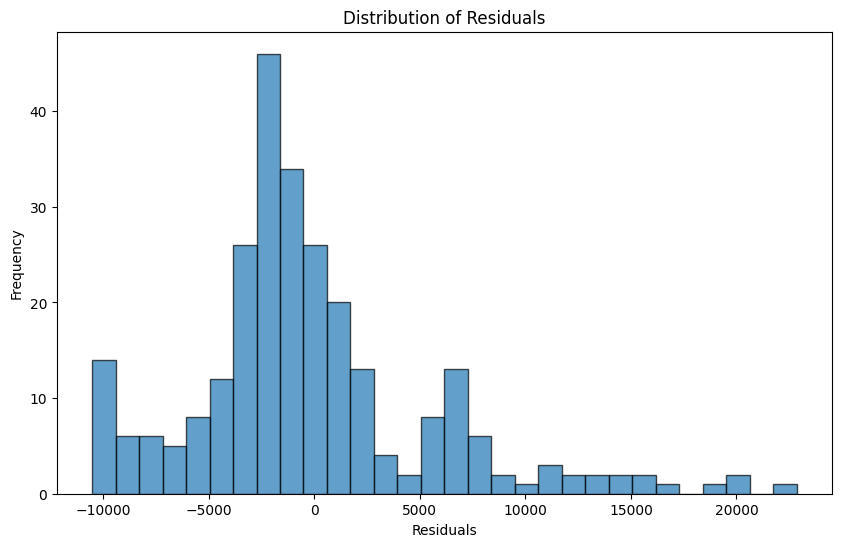

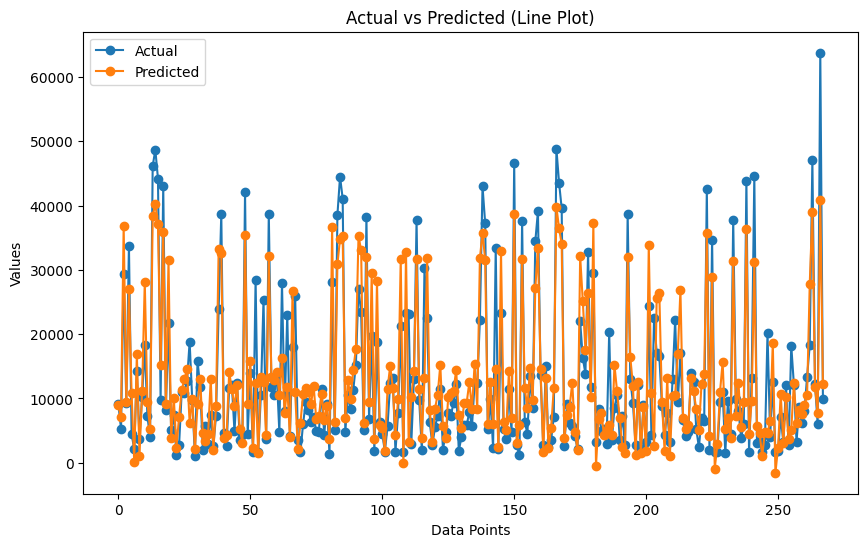

In [19]:
results(y_pred_linear_reg)

## AdaBoost

Mean Squared Error: 20437912.642245267
Mean Absolute Error: 2648.0295058079105
Root Mean Squared Error: 4520.830968112529
R-squared: 0.8683537543536821


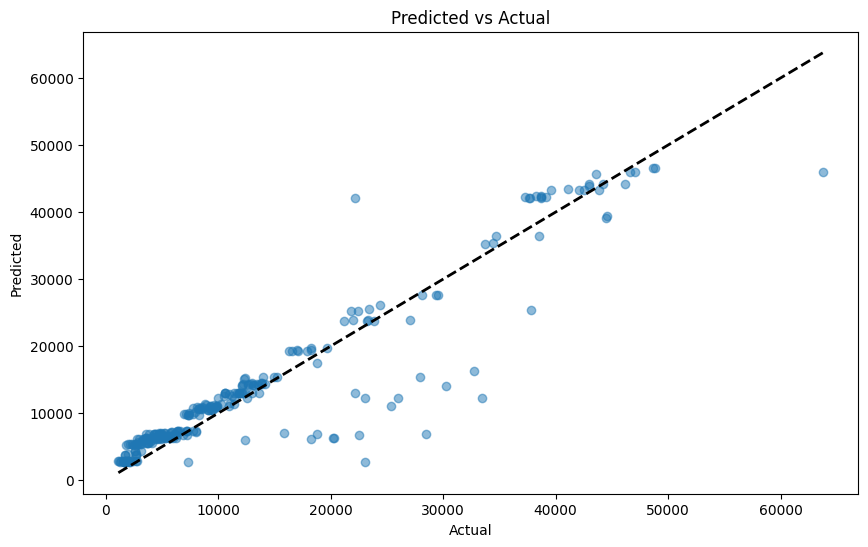

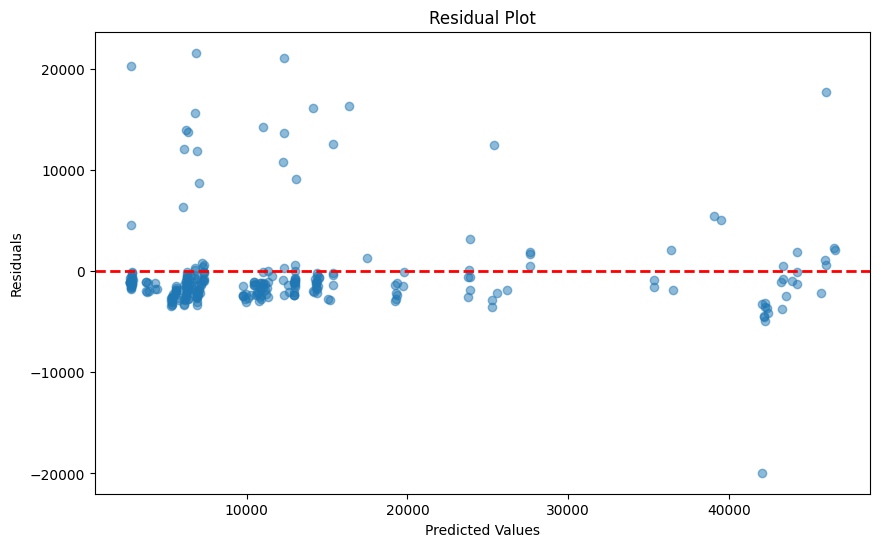

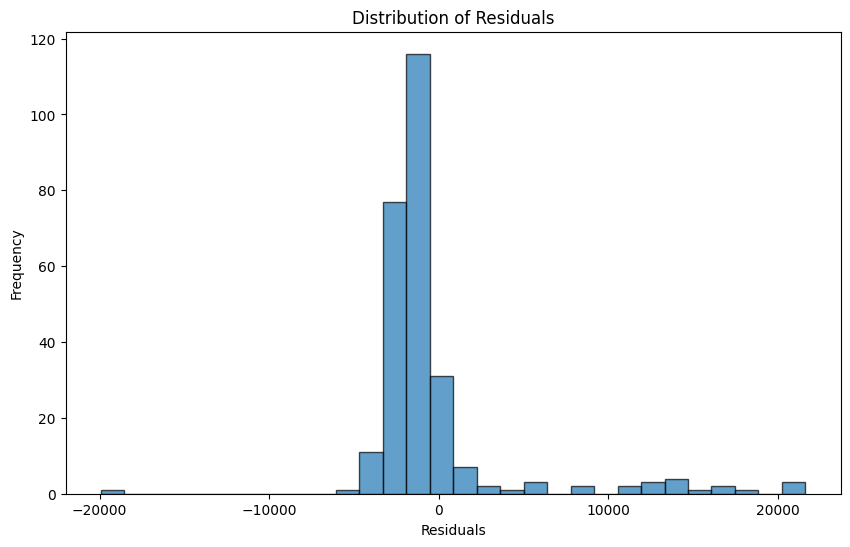

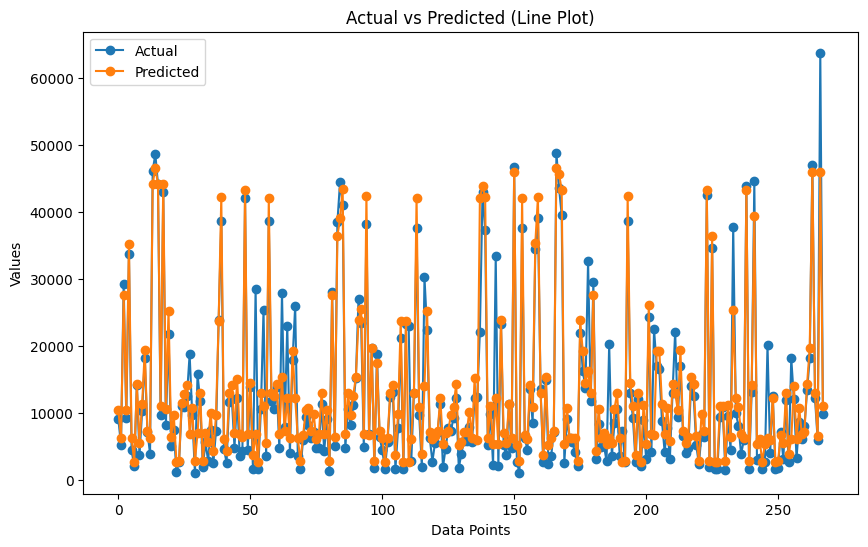

In [20]:
results(y_pred_adaboost)

## Gradient Boost

Mean Squared Error: 40879455.57358111
Mean Absolute Error: 3150.309836358801
Root Mean Squared Error: 6393.704370205202
R-squared: 0.7366841250116928


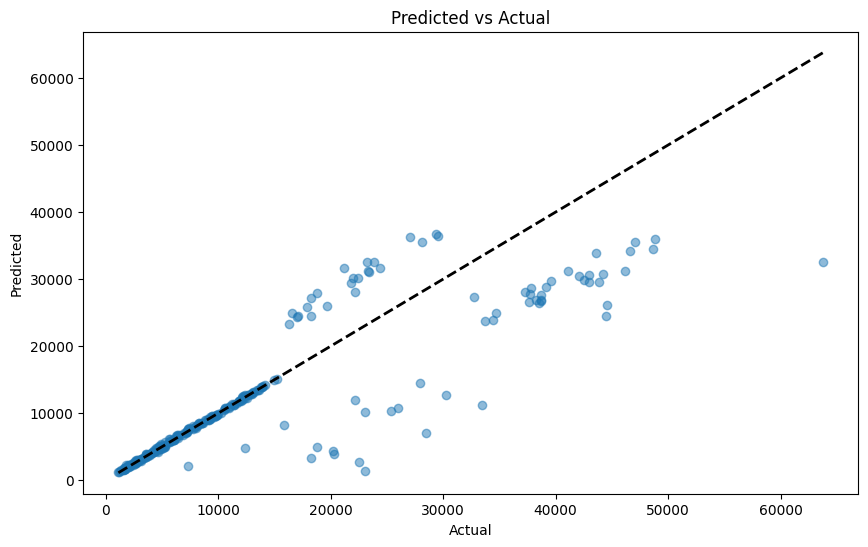

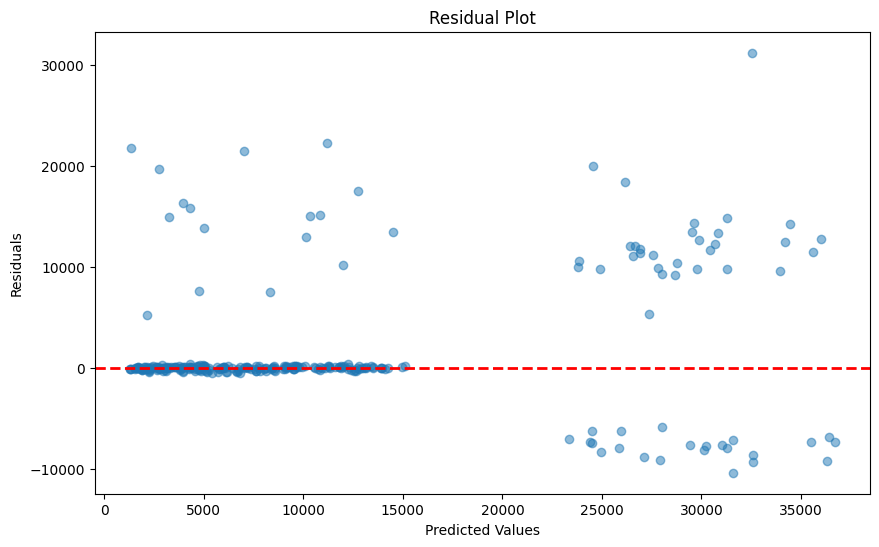

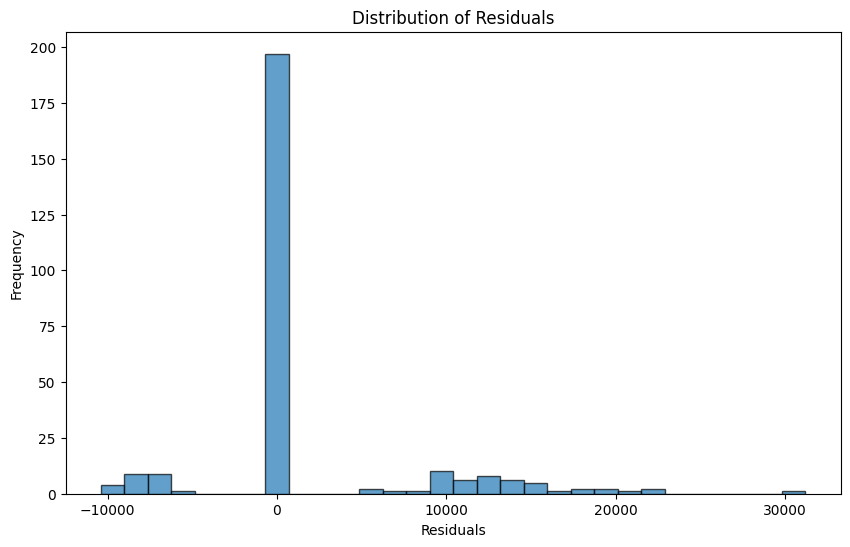

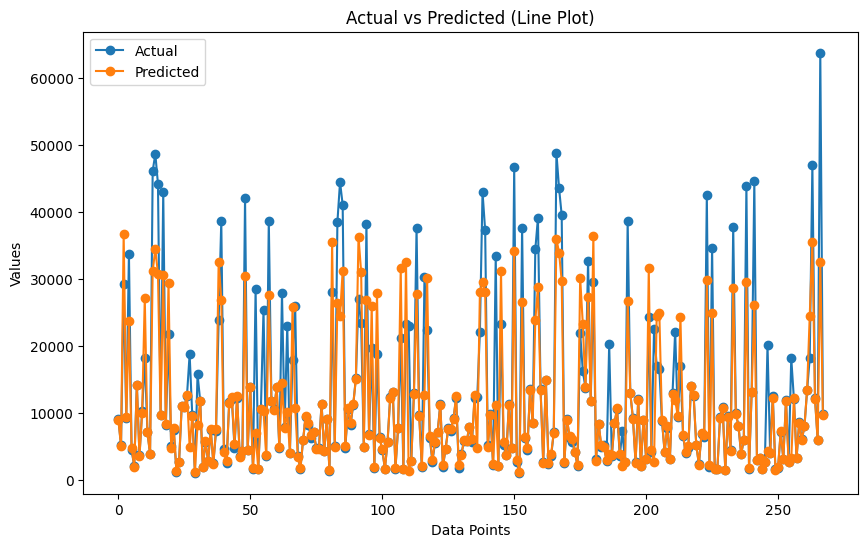

In [21]:
results(y_pred_grad_boost)

## Random Forest

Mean Squared Error: 20952703.22429314
Mean Absolute Error: 2557.158694973704
Root Mean Squared Error: 4577.412284718642
R-squared: 0.8650378458943904


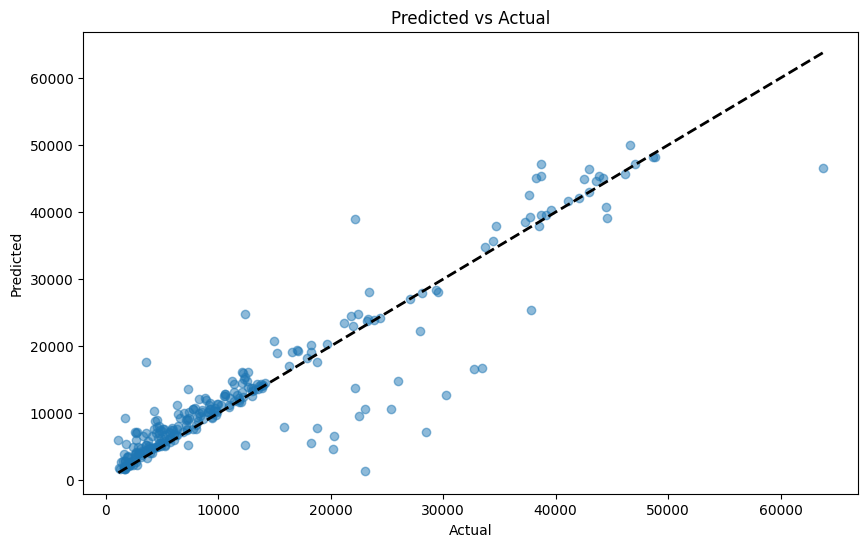

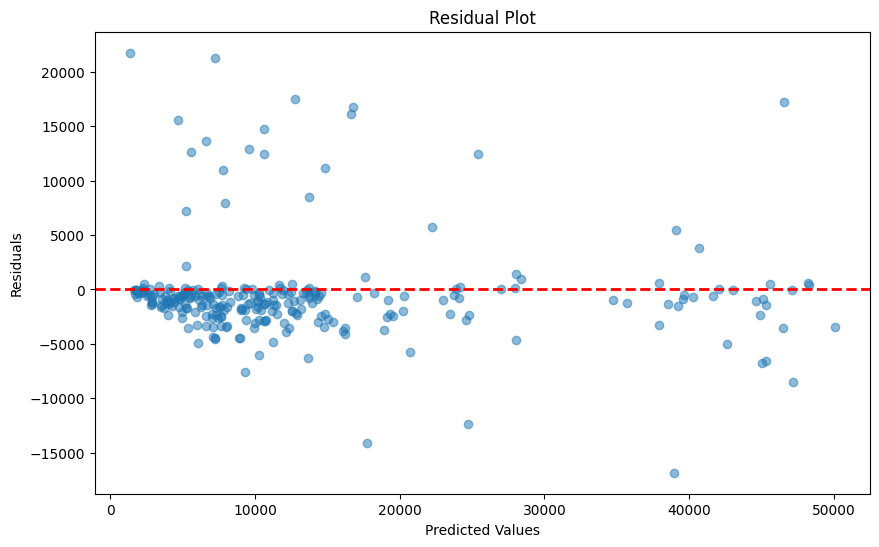

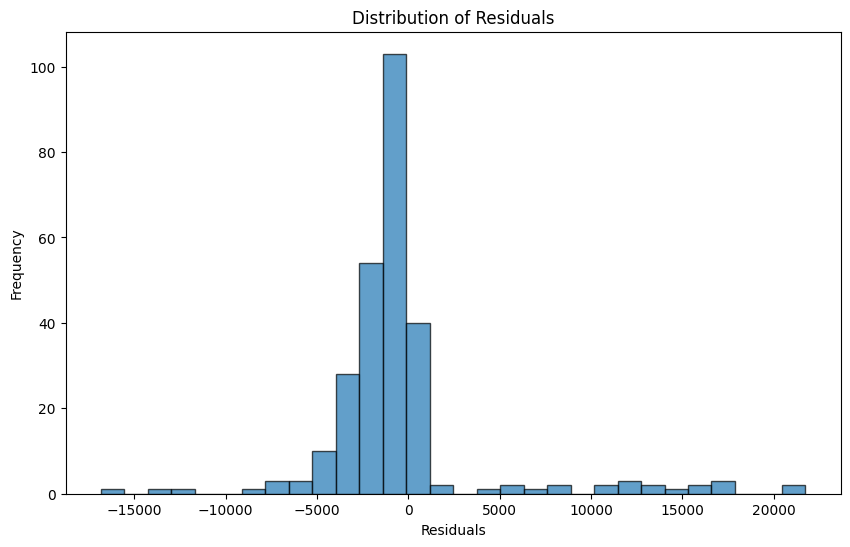

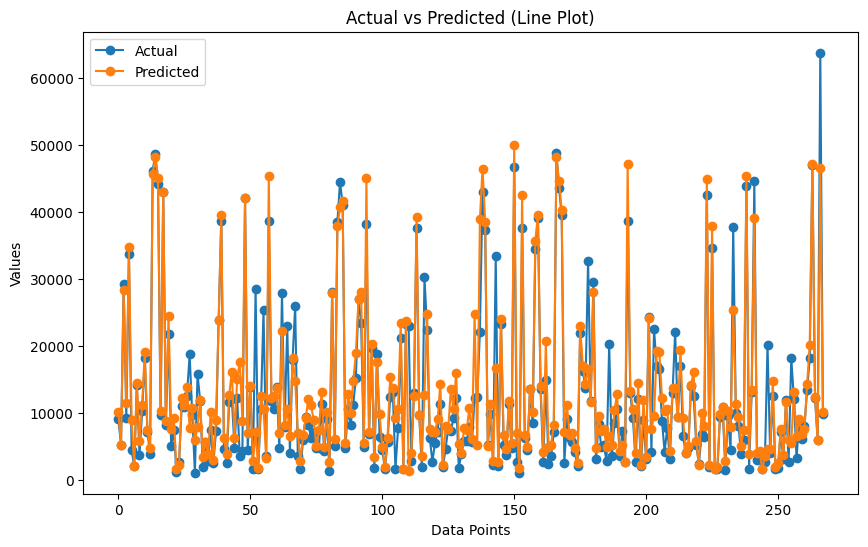

In [22]:
results(y_pred_rand_forest)

## Neural Net

Mean Squared Error: 22125054.386660427
Mean Absolute Error: 2426.2248999244835
Root Mean Squared Error: 4703.727711789919
R-squared: 0.8574864079463811


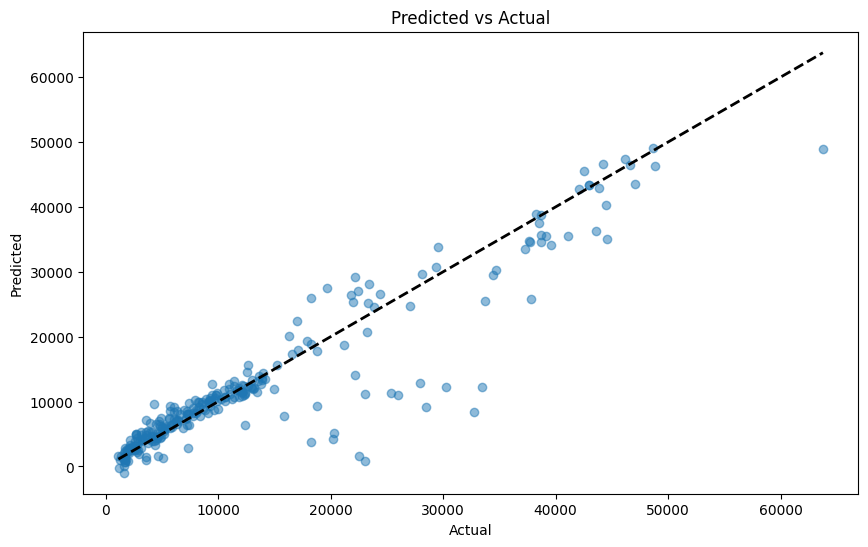

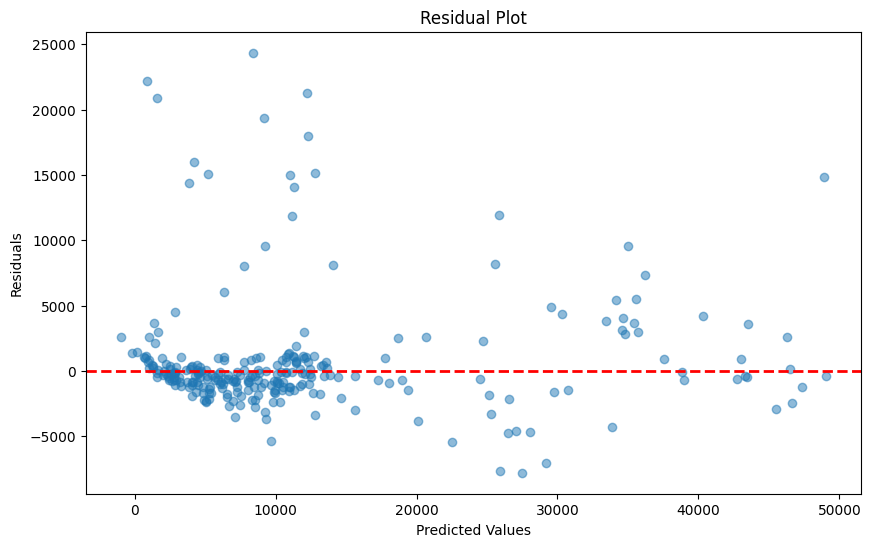

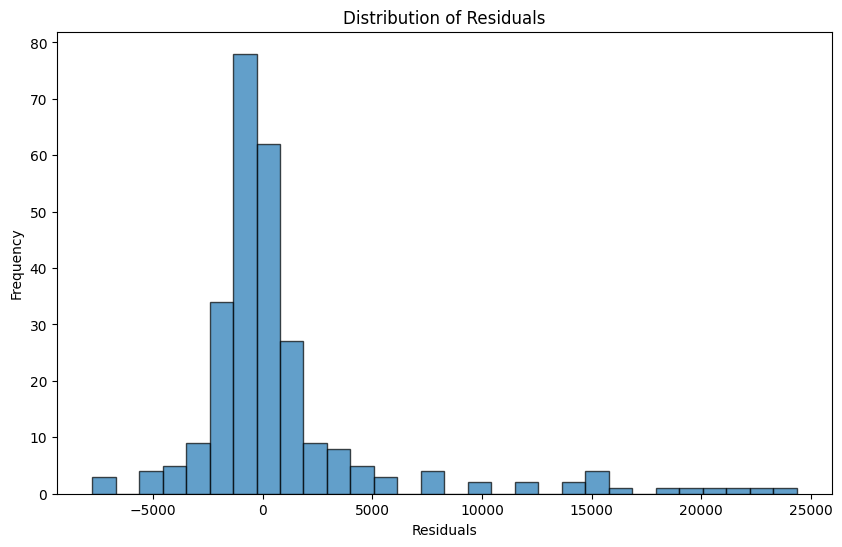

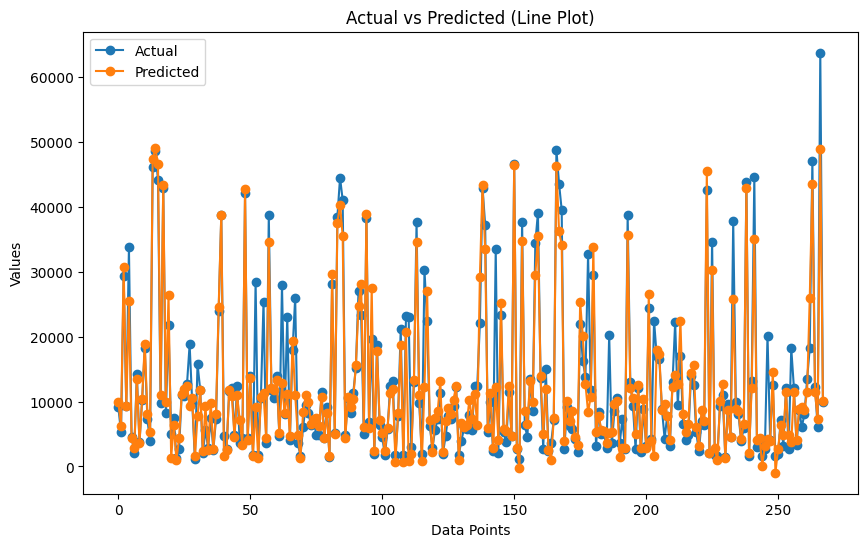

In [23]:
results(y_pred_nn.flatten())